In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [47]:
# Linear model
lr = linear_model.LinearRegression()
lr.fit(X, y)

ridge = linear_model.Ridge()
ridge.fit(X, y)

huber = linear_model.HuberRegressor()
huber.fit(X, y)

ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_trials=100, min_samples=None,
        random_state=None, residual_metric=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

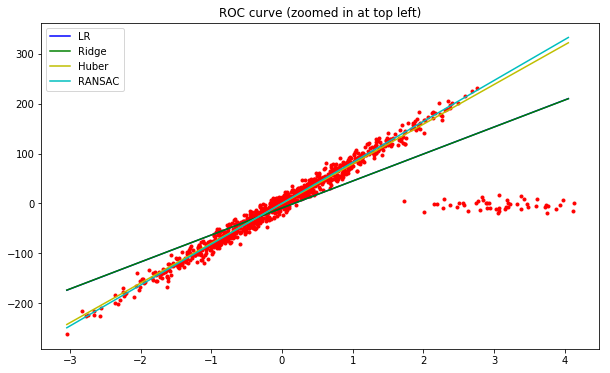

In [50]:
nmin = np.amin(X)
nmax = np.amax(X)
xx = np.arange(nmin, nmax, 0.1)
plt.figure(figsize=(10,6))
plt.plot(X, y, 'r.')
plt.plot(xx, lr.predict(xx[:, np.newaxis]), 'b-', label='LR')
plt.plot(xx, ridge.predict(xx[:, np.newaxis]), 'g-', label='Ridge')
plt.plot(xx, huber.predict(xx[:, np.newaxis]), 'y-', label='Huber')
plt.plot(xx, ransac.predict(xx[:, np.newaxis]), 'c-', label='RANSAC')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()
